Basic libraries

In [ ]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

In [ ]:
# Read CSV
url = 'https://raw.githubusercontent.com/codymbaldwin/sample-files/master/theme_park_reviews.csv'
df = pd.read_csv(url)

Sentiment analysis - add up to 1

In [ ]:
df.head()

,review
0,If you've ever been to Disneyland anywhere you...
1,Its been a while since d last time we visit HK...
2,Thanks God it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...
4,"the location is not in the city, took around 1..."


In [ ]:
# Generate sentiment score for each review
analyzer = SentimentIntensityAnalyzer()
df['review_score'] = df['review'].apply(lambda review: analyzer.polarity_scores(review))

In [ ]:
df.head()

,review,review_score
0,If you've ever been to Disneyland anywhere you...,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
1,Its been a while since d last time we visit HK...,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
2,Thanks God it wasn t too hot or too humid wh...,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
3,HK Disneyland is a great compact park. Unfortu...,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
4,"the location is not in the city, took around 1...","{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."


In [ ]:
# Extract the compound sentiment score.
df['Compound Score']  = df['review_score'].apply(lambda score_dict: score_dict['compound'])
df.head()

,review,review_score,Compound Score
0,If you've ever been to Disneyland anywhere you...,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069
1,Its been a while since d last time we visit HK...,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901
2,Thanks God it wasn t too hot or too humid wh...,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920
3,HK Disneyland is a great compact park. Unfortu...,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489
4,"the location is not in the city, took around 1...","{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846


In [ ]:
# Extract the compound sentiment score - negative values.
df['Neg Score']  = df['review_score'].apply(lambda score_dict: score_dict['neg'])
df.head()

,review,negative_phrases,review_score,Compound Score,sentiment,Neg Score
0,If you've ever been to Disneyland anywhere you...,[],"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,0.243981,0.000
1,Its been a while since d last time we visit HK...,"[Turns into Star Wars!!, Seems more local like...","{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,0.236131,0.040
2,Thanks God it wasn t too hot or too humid wh...,[],"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,0.160498,0.024
3,HK Disneyland is a great compact park. Unfortu...,[Unfortunately there is quite a bit of mainten...,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,0.189286,0.080
4,"the location is not in the city, took around 1...",[],"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,0.266667,0.000


In [ ]:
# Export the data back to a CSV file.
from google.colab import files
df.to_csv('review_scores.csv')
files.download('review_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Directly extract the 'neg' score assuming 'review_score' is a dictionary-like object
df['neg_score'] = df['review_score'].apply(lambda x: x['neg'])

# Calculate the 85th percentile of the negative scores
neg_85th_percentile = df['neg_score'].quantile(0.85)

# Filter rows where 'neg_score' is in the top 15%
filtered_df = df[df['neg_score'] >= neg_85th_percentile]

# Display the filtered data
print(filtered_df)

                                                  review  \
3      HK Disneyland is a great compact park. Unfortu...   
6      Great place! Your day will go by and you won't...   
10     Disneyland never cease to amaze me! I've been ...   
12     We spend two days, the second day went early t...   
25     Disneylands the world over are generic apart f...   
...                                                  ...   
29010  I just visited Disneyland and was quite disapp...   
29014  We (two families   4 adults, 3 kids) went to D...   
29020  We were at Disneyland September 8 12th. What a...   
29023  never again...what a horrible experience, the ...   
29024  We take a long weekend trip to California each...   

                                            review_score  Compound Score  \
3      {'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...          0.8489   
6      {'neg': 0.087, 'neu': 0.693, 'pos': 0.22, 'com...          0.7489   
10     {'neg': 0.083, 'neu': 0.788, 'pos': 0.129, '

Word clouds

In [ ]:
# Join all the review data together into one string.
review_text = " ".join(review for review in df.review)

In [ ]:
df.head()

In [ ]:
# Create stopword list.
stopwords = set(STOPWORDS)
stopwords.update(["words"])

# Generate a word cloud.
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(review_text)

# Display the generated image.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.describe()

In [ ]:
# Create a new dataframe with only the negative reviews.
df_negative = df[df['Compound Score'] < 0]
df_negative.head()

In [ ]:
# Export the data back to a CSV file.
from google.colab import files
df.to_csv('negative_reviews.csv')
files.download('negative_reviews.csv')

In [ ]:
# Join the negative review data together into one string.
review_text_negative = " ".join(review for review in df_negative.review)

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


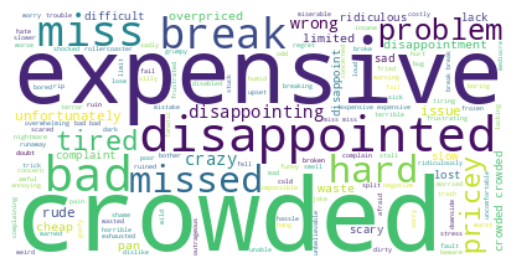

In [ ]:

# Download the negative word list if you don't have it already
nltk.download('opinion_lexicon')
nltk.download('punkt')

# Create stopword list.
stopwords = set(STOPWORDS)
#stopwords.update(["wait", "long", "disapointing", "lines", "line", "not", "no", "fast pass", "fastpass"])

# Get negative words from opinion lexicon (nltk) or define your own list of negative words
negative_words = set(opinion_lexicon.negative())

# Tokenize the review text
tokens = word_tokenize(review_text.lower())

# Filter the tokens to include only negative words
negative_tokens = [word for word in tokens if word in negative_words]

# Join the negative tokens into a string
negative_text = ' '.join(negative_tokens)

# Generate a word cloud using only negative words
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative_text)

# Display the generated image.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# Define the keywords to search for
keywords = ['waiting', 'wait', 'fastpass', 'expensive', 'shows', 'show']

# Create a function to check if any keyword is present in the negative phrases
def contains_keywords(phrase):
    # Check if phrase is a list
    if isinstance(phrase, list):
        # If it's a list, join its elements into a single string
        phrase = ' '.join(phrase)
    # Apply lower() to the string and check for keywords
    return any(keyword in phrase.lower() for keyword in keywords)

# Filter the DataFrame by applying the function to the 'negative_phrases' column
filtered_df = df[df['negative_phrases'].apply(contains_keywords)]

# Display the filtered DataFrame
print(filtered_df[['negative_phrases']])

                                        negative_phrases
5      [forget trying to see one of the shows its a f...
11     [Do the haunted house, catch the lion king sho...
15     [After visiting would advise everyone to look ...
29     [We also stayed at Disney Hollywood Hotel   wh...
42      [don't miss the Festival of the Lion King Show.]
...                                                  ...
29010  [I just visited Disneyland and was quite disap...
29014  [We (two families   4 adults, 3 kids) went to ...
29021  [If you are thinking about this program, stop ...
29023  [never again...what a horrible experience, the...
29025  [Look up over the Fire House & that was Walt's...

[2655 rows x 1 columns]
